# Explainable credit card fraud prediction
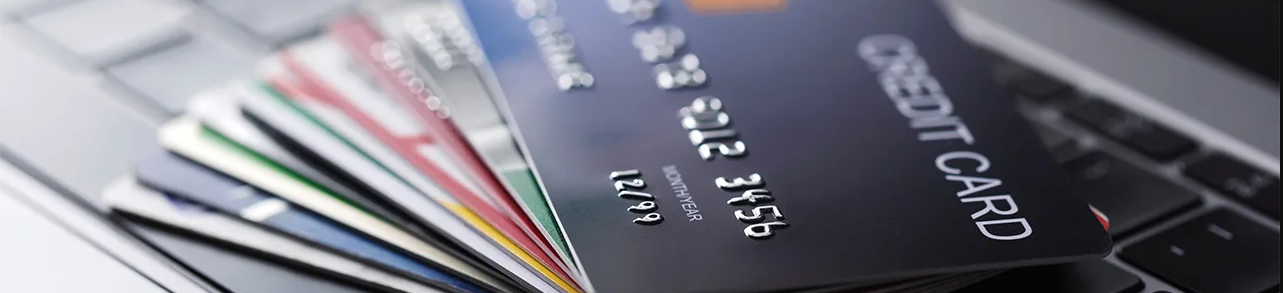

In [1]:
# Load imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
plt.style.use('fivethirtyeight')

## Data

Sorce: https://app.datacamp.com/workspace/sample-datasets/dataset-python-credit-card-fraud

This dataset consists of credit card transactions in the western United States. It includes information about each transaction including customer details, the merchant and category of purchase, and whether or not the transaction was a fraud.


| Column       | Description                                     |
|--------------|-------------------------------------------------|
| trans_date_trans_time | Transaction DateTime                            |
| merchant     | Merchant Name                                   |
| category     | Category of Merchant                            |
| amt          | Amount of Transaction                           |
| city         | City of Credit Card Holder                      |
| state        | State of Credit Card Holder                     |
| lat          | Latitude Location of Purchase                   |
| long         | Longitude Location of Purchase                  |
| city_pop     | Credit Card Holder's City Population            |
| job          | Job of Credit Card Holder                       |
| dob          | Date of Birth of Credit Card Holder             |
| trans_num    | Transaction Number                              |
| merch_lat    | Latitude Location of Merchant                   |
| merch_long   | Longitude Location of Merchant                  |
| is_fraud     | Whether Transaction is Fraud (1) or Not (0)     |

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('credit_card_fraud.csv')
df

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339602,2020-12-31 23:57:56,Schmidt-Larkin,home,12.68,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,a8310343c189e4a5b6316050d2d6b014,65.623593,-165.186033,0
339603,2020-12-31 23:58:04,"Pouros, Walker and Spence",kids_pets,13.02,Greenview,CA,41.5403,-122.9366,308,Call centre manager,1958-09-20,bd7071fd5c9510a5594ee196368ac80e,41.973127,-123.553032,0
339604,2020-12-31 23:59:07,Reilly and Sons,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0
339605,2020-12-31 23:59:15,Rau-Robel,kids_pets,86.88,Burbank,WA,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              339607 non-null  object 
 12  merch_lat              339607 non-null  float64
 13  merch_long             339607 non-null  float64
 14  is_fraud               339607 non-nu

- No missing values :)

In [4]:
df.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,339607.000000,339607.000000,339607.000000,3.396070e+05,339607.000000,339607.000000,339607.000000
mean,70.577984,39.718991,-110.622605,1.071409e+05,39.718853,-110.622383,0.005247
std,161.675242,5.094961,12.651370,2.930299e+05,5.130894,12.663998,0.072248
min,1.000000,20.027100,-165.672300,4.600000e+01,19.027422,-166.671575,0.000000
25%,9.600000,36.715400,-120.093600,4.710000e+02,36.817194,-119.823755,0.000000
50%,46.460000,39.617100,-111.098500,1.645000e+03,39.586209,-111.036443,0.000000
75%,83.350000,41.710000,-100.621500,3.543900e+04,42.193072,-100.353096,0.000000
max,28948.900000,66.693300,-89.628700,2.383912e+06,67.510267,-88.629203,1.000000


In [5]:
df.nunique()

trans_date_trans_time    338504
merchant                    693
category                     14
amt                       32112
city                        176
state                        13
lat                         183
long                        183
city_pop                    174
job                         163
dob                         187
trans_num                339607
merch_lat                335608
merch_long               337263
is_fraud                      2
dtype: int64

## Preprocessing/Feature engineering

In [6]:
print(df.trans_date_trans_time.max())
print(df.trans_date_trans_time.min())

2020-12-31 23:59:24
2019-01-01 00:00:44


In [7]:
#df = df.loc[:100000].copy()

In [8]:
df['age'] = 2020-pd.to_datetime(df['dob']).dt.year

In [9]:
df['month']=pd.to_datetime(df['trans_date_trans_time']).dt.month.astype('category')
df['day']=pd.to_datetime(df['trans_date_trans_time']).dt.weekday.astype('category')
df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour.astype('category')

In [10]:
df.drop(columns=['trans_date_trans_time','trans_num','dob'],inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   merchant    339607 non-null  object  
 1   category    339607 non-null  object  
 2   amt         339607 non-null  float64 
 3   city        339607 non-null  object  
 4   state       339607 non-null  object  
 5   lat         339607 non-null  float64 
 6   long        339607 non-null  float64 
 7   city_pop    339607 non-null  int64   
 8   job         339607 non-null  object  
 9   merch_lat   339607 non-null  float64 
 10  merch_long  339607 non-null  float64 
 11  is_fraud    339607 non-null  int64   
 12  age         339607 non-null  int64   
 13  month       339607 non-null  category
 14  day         339607 non-null  category
 15  hour        339607 non-null  category
dtypes: category(3), float64(5), int64(3), object(5)
memory usage: 34.7+ MB


# EDA 

In [12]:
df.is_fraud.value_counts()

0    337825
1      1782
Name: is_fraud, dtype: int64

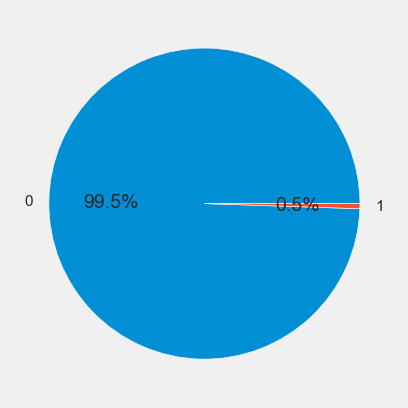

In [13]:
plt.pie(df.is_fraud.value_counts(),labels=['0','1'],autopct='%1.1f%%')
plt.show()

In [14]:
df.merchant.value_counts()

Kilback LLC        1149
Cormier LLC         985
Schumm PLC          931
Kuhn LLC            896
Dickinson Lt        891
                   ... 
Johnston-Caspe      191
Ebert-Daugherty     191
Kris-Kertzmann      186
Jerde-Hermann       184
Lynch-Moh           171
Name: merchant, Length: 693, dtype: int64

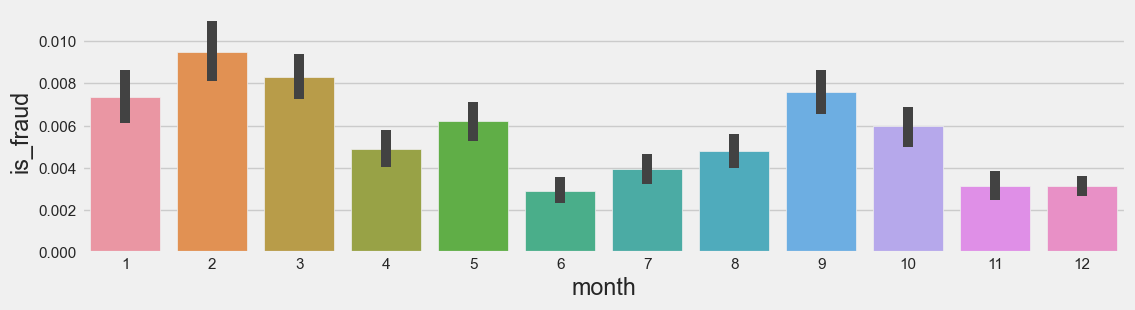

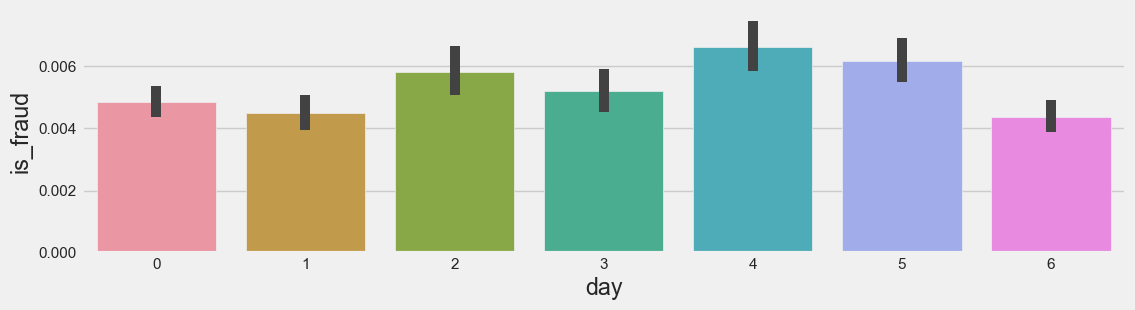

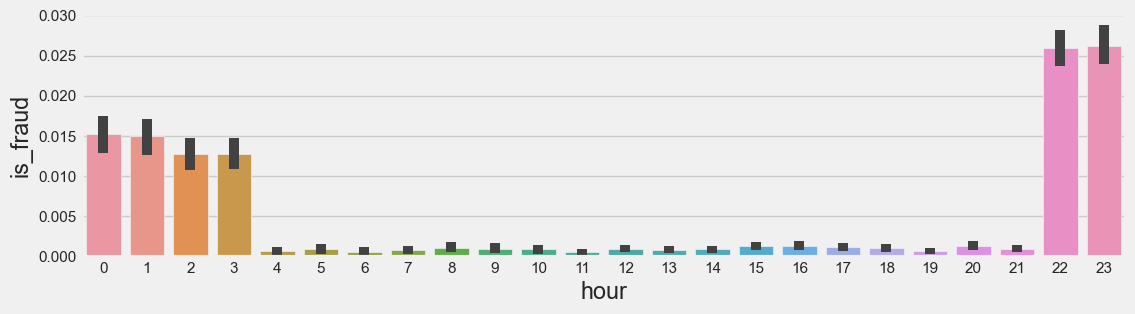

In [15]:
plt.figure(figsize=(12,3))
sns.barplot(data=df,x='month',y='is_fraud')
plt.show()
plt.figure(figsize=(12,3))
sns.barplot(data=df,x='day',y='is_fraud')
plt.show()
plt.figure(figsize=(12,3))
sns.barplot(data=df,x='hour',y='is_fraud')
plt.show()

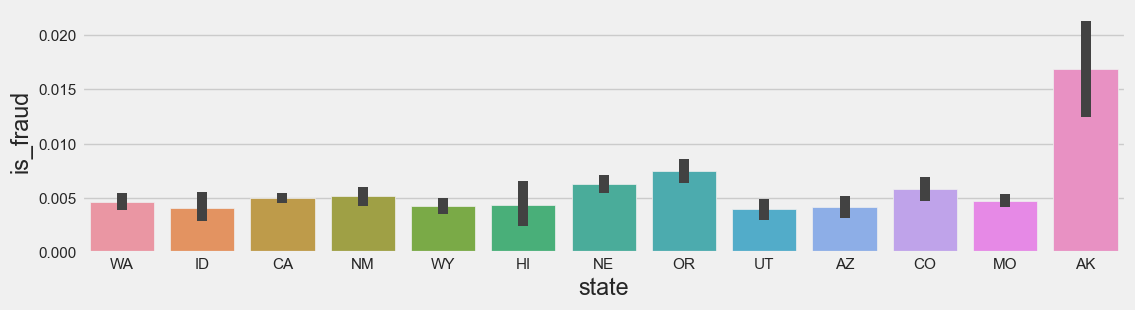

In [16]:
plt.figure(figsize=(12,3))
sns.barplot(data=df,x='state',y='is_fraud')
plt.show()

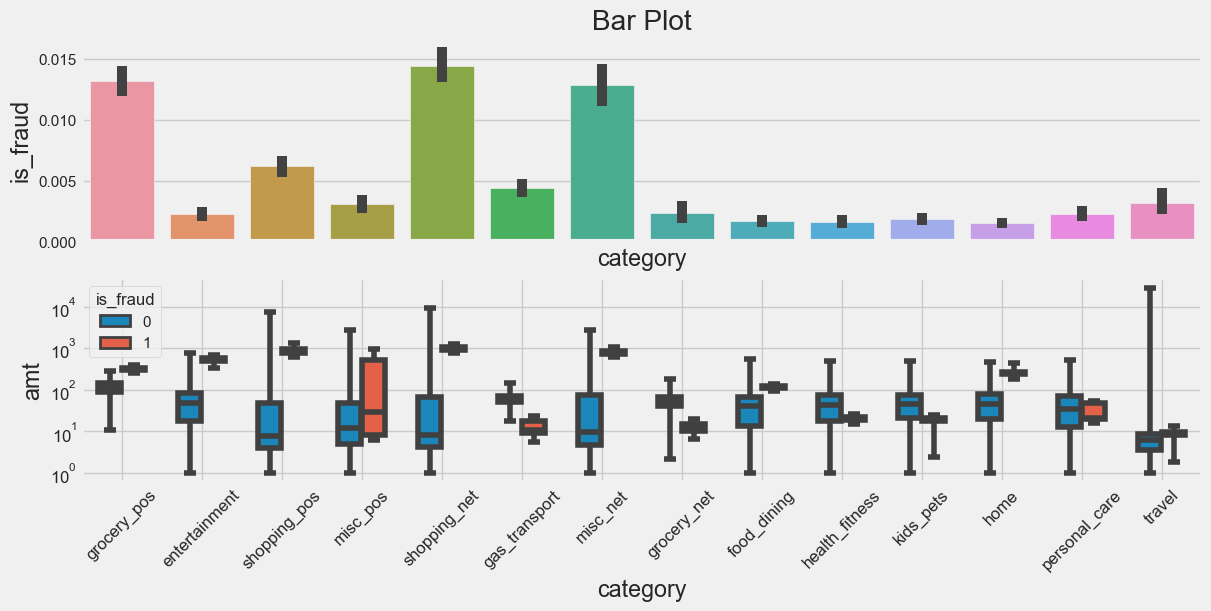

In [17]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6),sharex=True,constrained_layout=True)

# Plot the first subplot (barplot)
sns.barplot(data=df, x='category', y='is_fraud', ax=axes[0])
axes[0].set_xticks([])
axes[0].set_title('Bar Plot')

# Plot the second subplot (boxplot)
sns.boxplot(
    data=df, x="category", y="amt", hue='is_fraud',
    whis=[0, 100], width=.6, ax=axes[1]
)

axes[1].xaxis.grid(True)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_yscale("log")

# Tweak the visual presentation for the second subplot
axes[1].yaxis.grid(True)
axes[1].yaxis.tick_left()
axes[1].tick_params(axis='both', which='both', labelsize=12)
#axes[1].legend(loc='upper right')

# Adjust layout
#plt.tight_layout()

# Show the plots
plt.show()

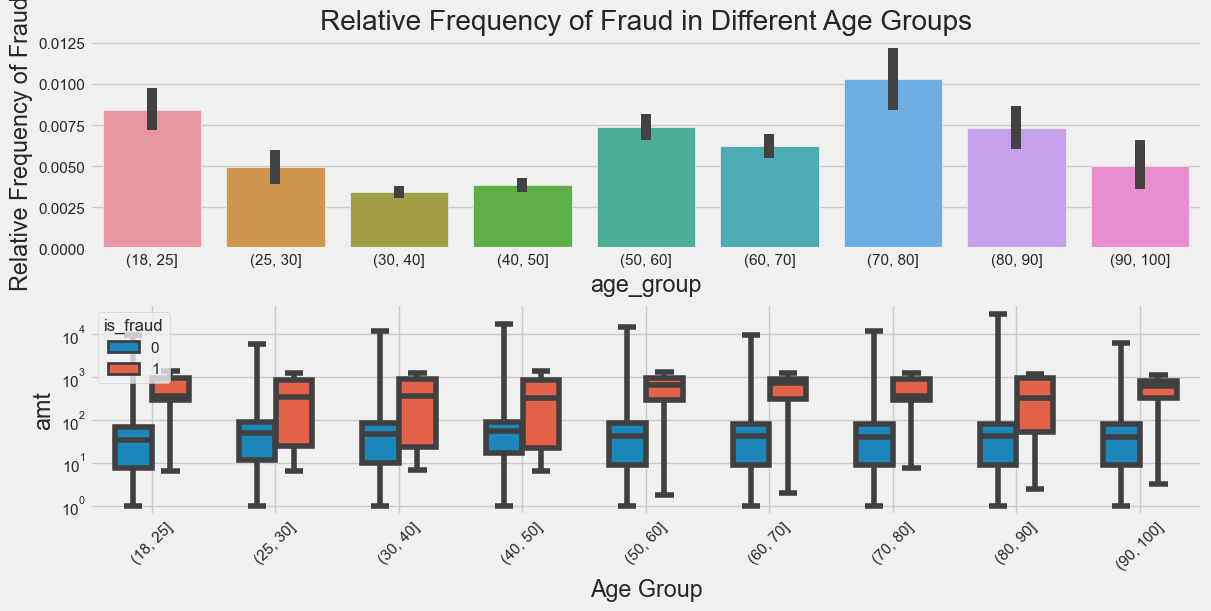

In [18]:
# Define age bins
age_bins = [18,25,30, 40, 50, 60, 70, 80, 90, 100]

# Create a new column with age groups
df['age_group'] = pd.cut(df['age'], bins=age_bins)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6), constrained_layout=True)

# Plot the relative frequency of fraud in each age group
sns.barplot(data=df, x='age_group', y='is_fraud', ax=axes[0])

sns.boxplot(
    data=df, x="age_group", y="amt", hue='is_fraud',
    whis=[0, 100], width=.6, ax=axes[1]
)

axes[1].xaxis.grid(True)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_yscale("log")

# Set titles and labels
axes[0].set_title('Relative Frequency of Fraud in Different Age Groups')
axes[1].set_xlabel('Age Group')
axes[0].set_ylabel('Relative Frequency of Fraud')

# Show the plot
plt.show()

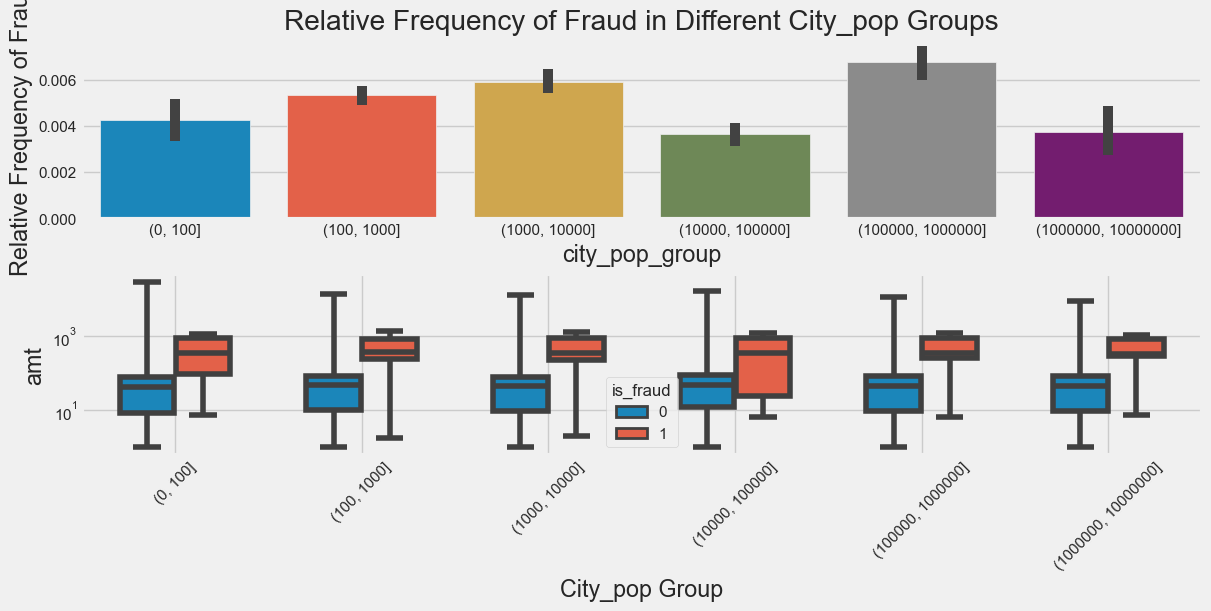

In [19]:
# Define age bins
city_pop_bins = [0,100,1000,10000,100000,1000000,10000000]

# Create a new column with age groups
df['city_pop_group'] = pd.cut(df['city_pop'], bins=city_pop_bins)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6), constrained_layout=True)

# Plot the relative frequency of fraud in each age group
sns.barplot(data=df, x='city_pop_group', y='is_fraud', ax=axes[0])

sns.boxplot(
    data=df, x="city_pop_group", y="amt", hue='is_fraud',
    whis=[0, 100], width=.6, ax=axes[1]
)

axes[1].xaxis.grid(True)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_yscale("log")

# Set titles and labels
axes[0].set_title('Relative Frequency of Fraud in Different City_pop Groups')
axes[1].set_xlabel('City_pop Group')
axes[0].set_ylabel('Relative Frequency of Fraud')

# Show the plot
plt.show()

In [20]:
df.city_pop_group.value_counts()

(100, 1000]            117151
(1000, 10000]           87868
(10000, 100000]         59898
(100000, 1000000]       43246
(0, 100]                19746
(1000000, 10000000]     11698
Name: city_pop_group, dtype: int64

## Train models 
### Logistic regresson vs XGBoost

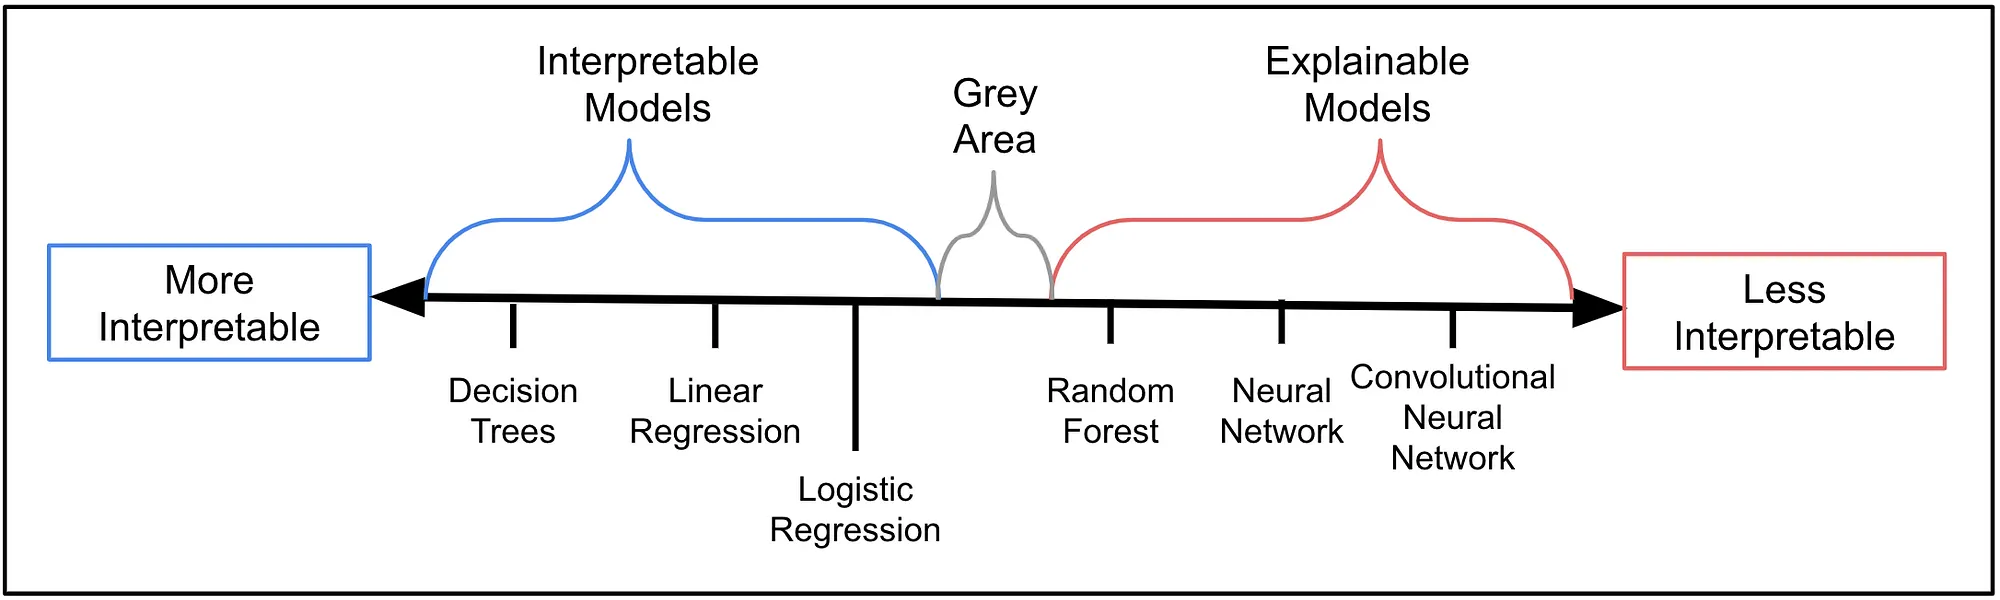

In [21]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder,MinMaxScaler

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   merchant        339607 non-null  object  
 1   category        339607 non-null  object  
 2   amt             339607 non-null  float64 
 3   city            339607 non-null  object  
 4   state           339607 non-null  object  
 5   lat             339607 non-null  float64 
 6   long            339607 non-null  float64 
 7   city_pop        339607 non-null  int64   
 8   job             339607 non-null  object  
 9   merch_lat       339607 non-null  float64 
 10  merch_long      339607 non-null  float64 
 11  is_fraud        339607 non-null  int64   
 12  age             339607 non-null  int64   
 13  month           339607 non-null  category
 14  day             339607 non-null  category
 15  hour            339607 non-null  category
 16  age_group       339607 non-null  categ

In [23]:
features = ['category','amt','state','age','month','day','hour','city_pop']

X = df[features] # Features (exclude the target variable)
y = df['is_fraud'] # Target variable

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Use OneHotEncoder to encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' to avoid multicollinearity
X_encoded = X.copy()  

# Fit and transform the categorical columns
X_encoded = pd.concat([X_encoded, pd.get_dummies(X_encoded[categorical_columns], drop_first=True)], axis=1)
X_encoded = X_encoded.drop(columns=categorical_columns)

# Use 70% of the data for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

X_train

,amt,age,city_pop,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
214787,290.48,65,4677,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165920,71.10,53,471,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
289556,79.36,21,895,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
184675,121.97,70,331,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236015,82.95,42,149,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,489.92,33,832,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
259178,40.92,21,1312922,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131932,67.11,20,8874,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
146867,11.50,36,27971,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
scaler = MinMaxScaler()

# Fit and transform X_train
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Transform X_test
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [25]:
X_train

,amt,age,city_pop,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0.017194,0.621622,0.001943,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.004164,0.459459,0.000178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.004654,0.027027,0.000356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.007185,0.689189,0.000120,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.004868,0.310811,0.000043,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237719,0.029040,0.189189,0.000330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
237720,0.002371,0.027027,0.550734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
237721,0.003927,0.013514,0.003703,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
237722,0.000624,0.229730,0.011714,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:

xgb_classifier = XGBClassifier()

#Train the model on the training data
xgb_classifier.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = xgb_classifier.predict(X_test)

#Evaluate the performance of the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[101309     30]
 [   141    403]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101339
           1       0.93      0.74      0.82       544

    accuracy                           1.00    101883
   macro avg       0.96      0.87      0.91    101883
weighted avg       1.00      1.00      1.00    101883



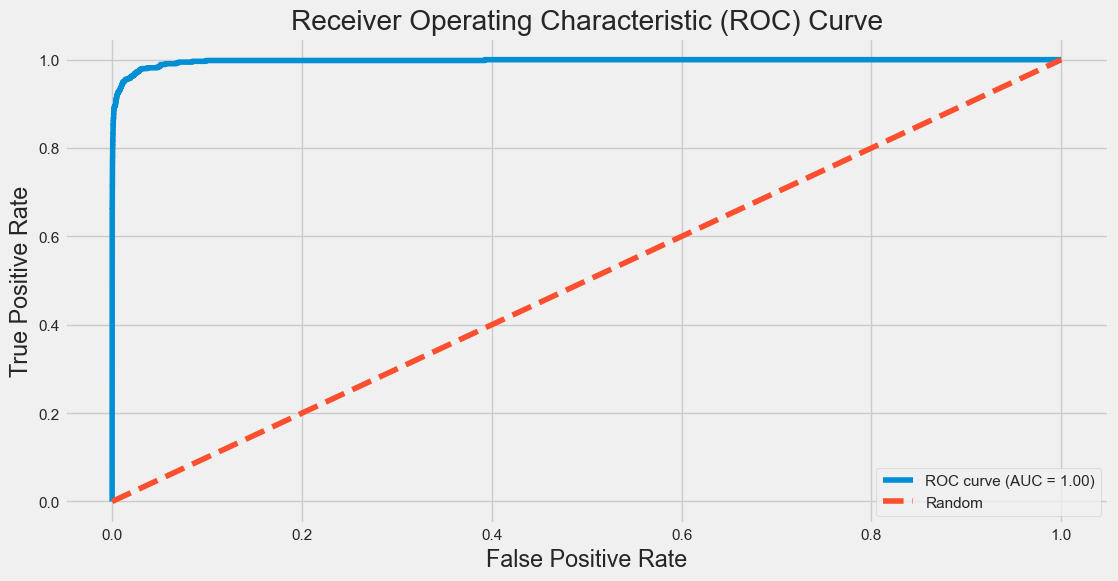

In [27]:
# Calculate the probabilites
y_pred_proba = xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [28]:
lr_classifier = LogisticRegression(random_state=42)

# Train the model on the training data
lr_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr_classifier.predict(X_test)

# Evaluate the performance of the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[101328     11]
 [   523     21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    101339
           1       0.66      0.04      0.07       544

    accuracy                           0.99    101883
   macro avg       0.83      0.52      0.54    101883
weighted avg       0.99      0.99      0.99    101883



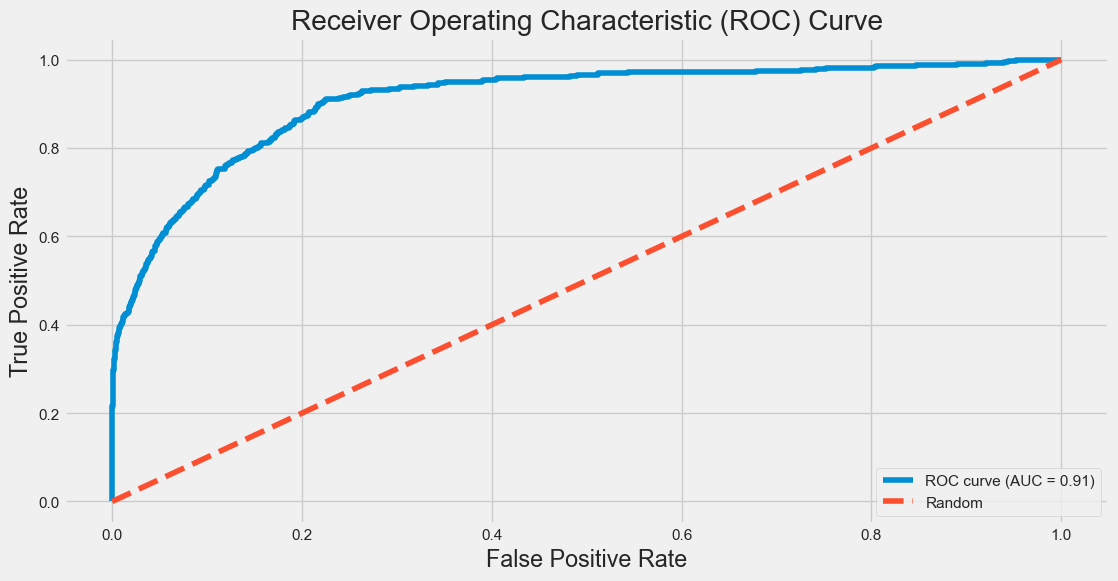

In [29]:
# Calculate the probabilites
y_pred_proba = lr_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## SHAP

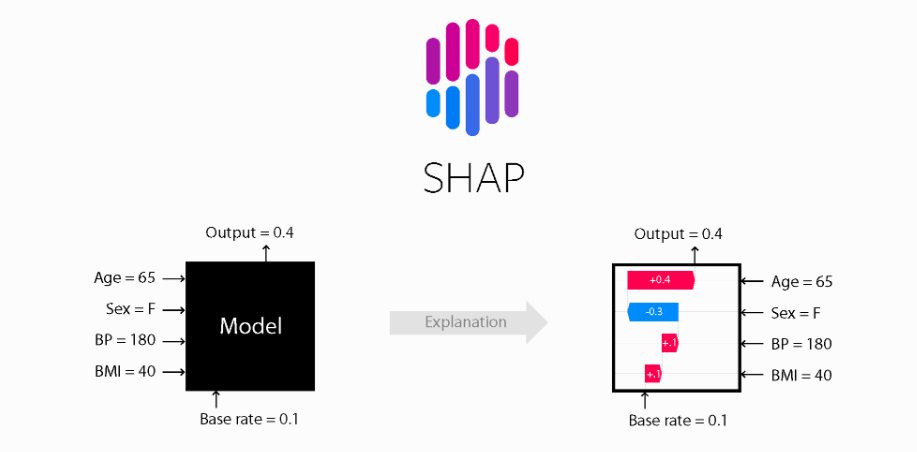

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions.

Sorce: https://github.com/shap/shap#citations

In [30]:
import shap
# print the JS visualization code to the notebook
shap.initjs()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [31]:
lr_explainer = shap.LinearExplainer(lr_classifier, X_train)
lr_shap_values = lr_explainer.shap_values(X_train)

In [33]:
xgb_explainer = shap.TreeExplainer(xgb_classifier, X_train)
xgb_shap_values = xgb_explainer.shap_values(X_train, check_additivity=False)

100%|===================| 237506/237724 [06:16<00:00]        

In [34]:
feature_name_list = []
for name in X_train.columns:
    feature_name_list.append(name)

### Global Explination

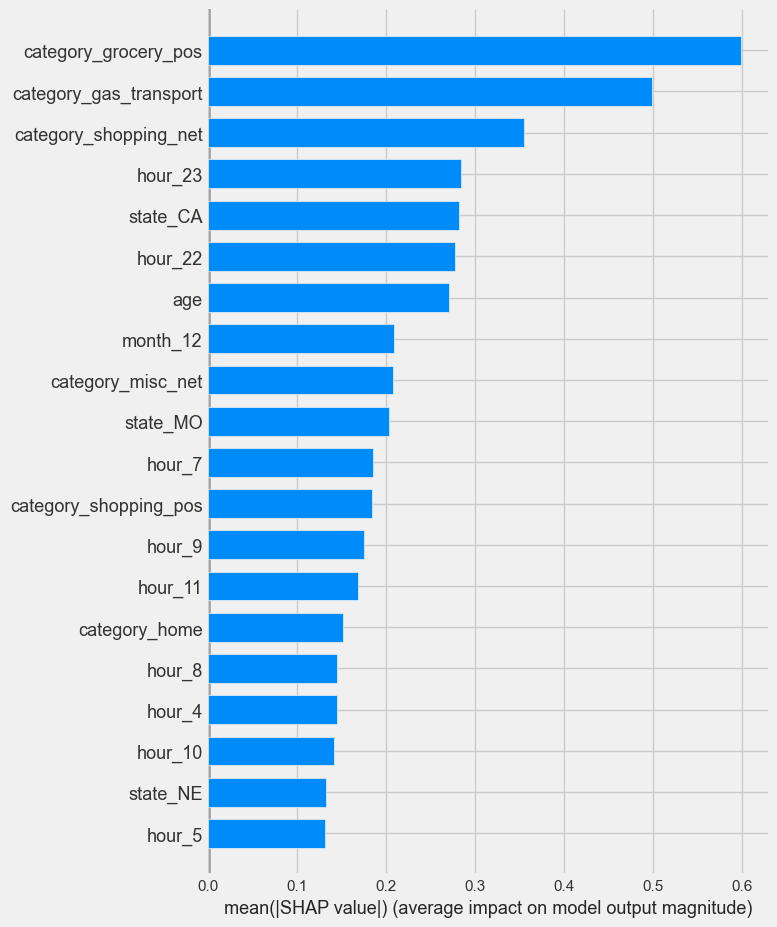

In [35]:
# Summary plot
shap.summary_plot(lr_shap_values, X_train, feature_names=feature_name_list, plot_type="bar")

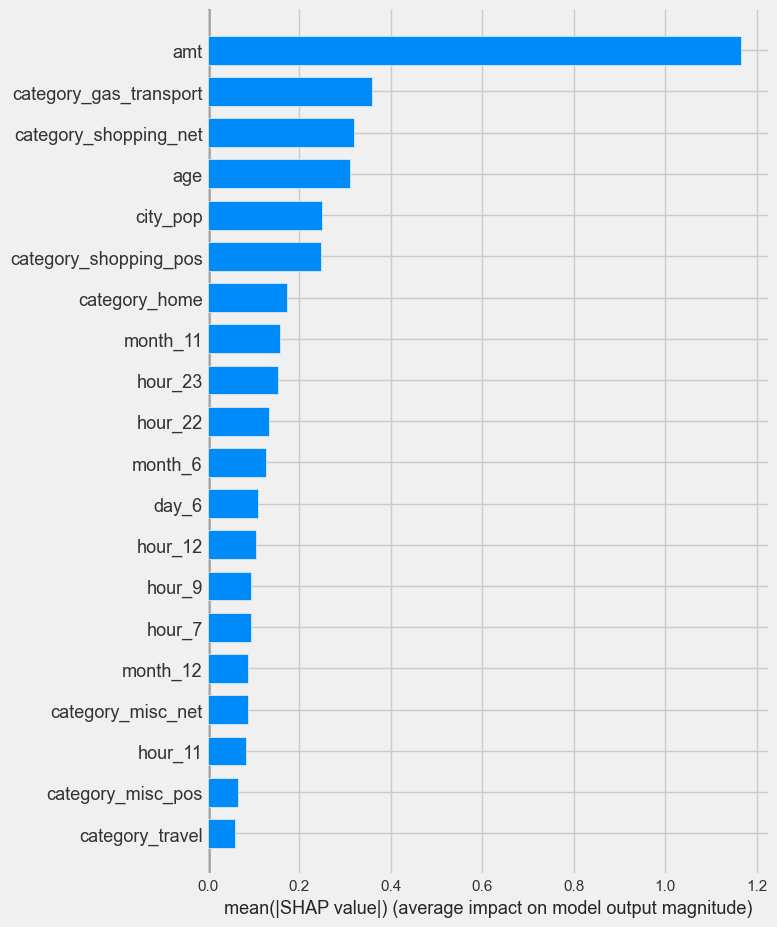

In [36]:
# Summary plot
shap.summary_plot(xgb_shap_values, X_train, feature_names=feature_name_list, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


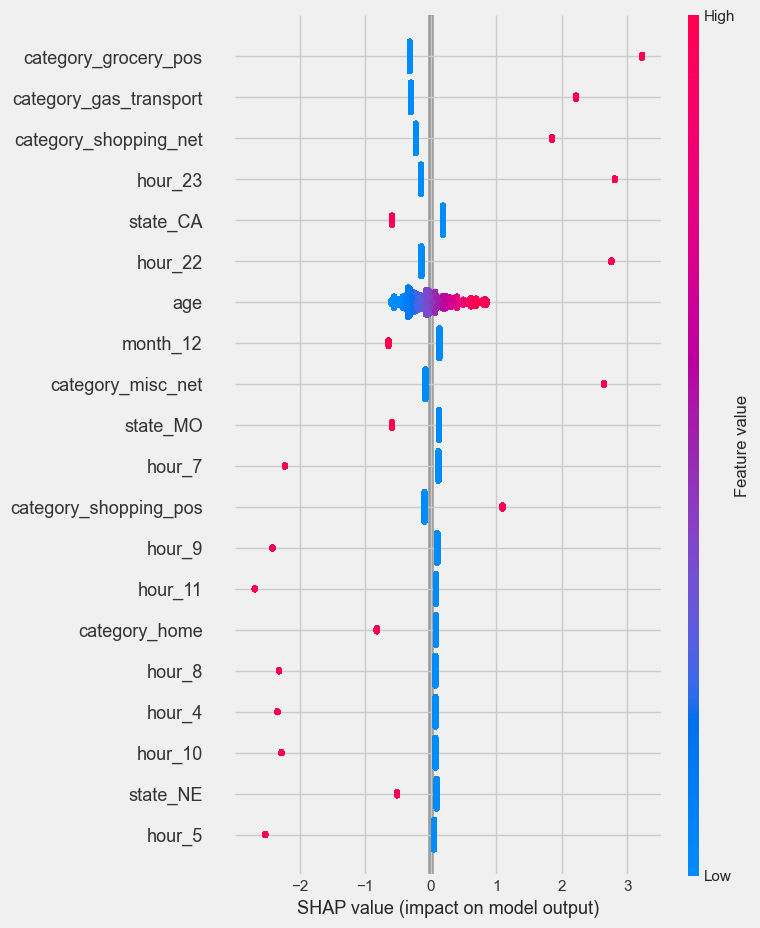

In [37]:
# Plot using shap.plots.beeswarm
shap.summary_plot(lr_shap_values, X_train, feature_names=feature_name_list)

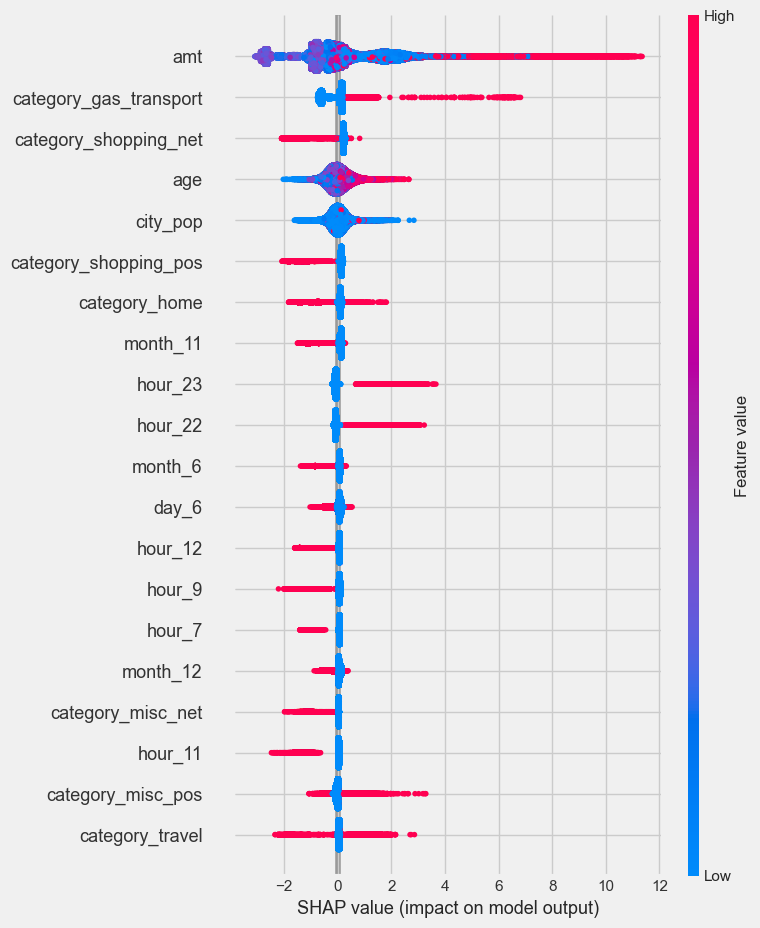

In [38]:
shap.summary_plot(xgb_shap_values,X_train, feature_names=feature_name_list)

In [39]:
X_train.columns

Index(['amt', 'age', 'city_pop', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'state_AZ', 'state_CA',
       'state_CO', 'state_HI', 'state_ID', 'state_MO', 'state_NE', 'state_NM',
       'state_OR', 'state_UT', 'state_WA', 'state_WY', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'day_1', 'day_2', 'day_3', 'day_4',
       'day_5', 'day_6', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dt

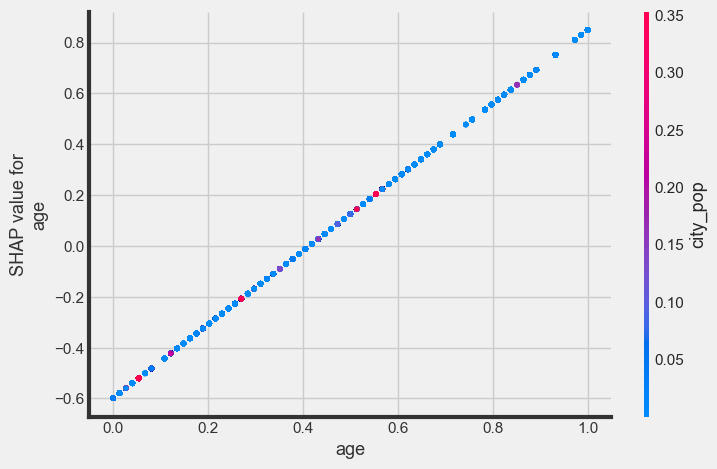

In [40]:
shap.dependence_plot('age',lr_shap_values, X_train)

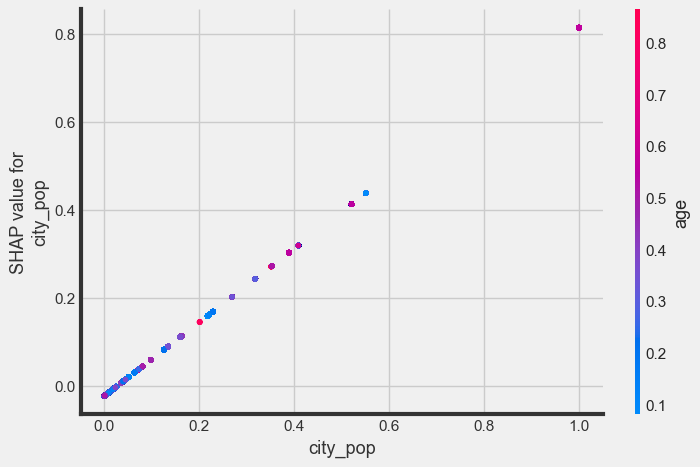

In [41]:
shap.dependence_plot('city_pop',lr_shap_values, X_train)

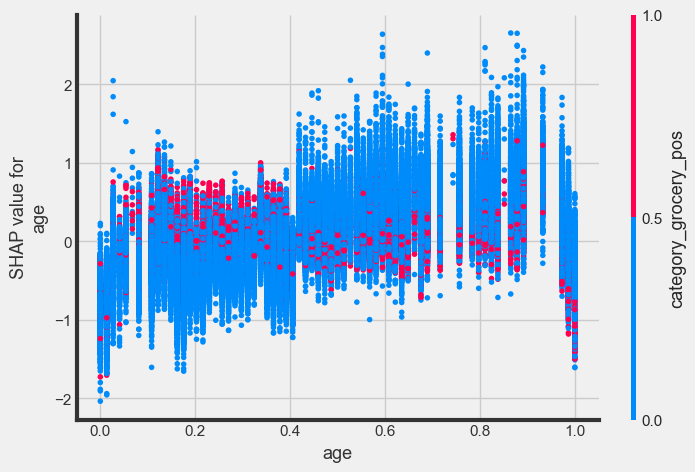

In [42]:
shap.dependence_plot("age", xgb_shap_values, X_train)

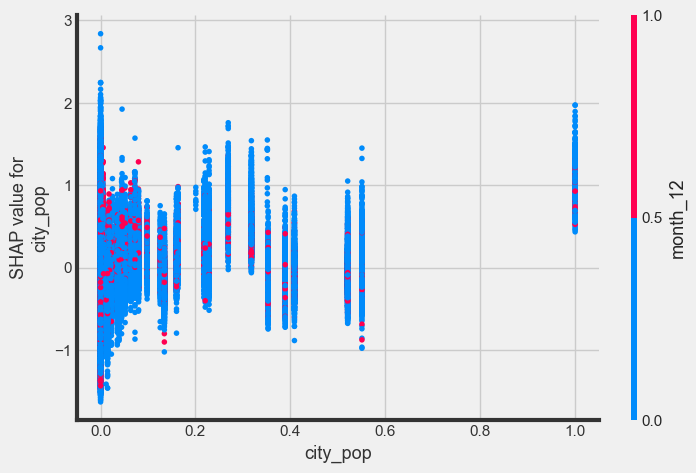

In [43]:
shap.dependence_plot("city_pop", xgb_shap_values, X_train)

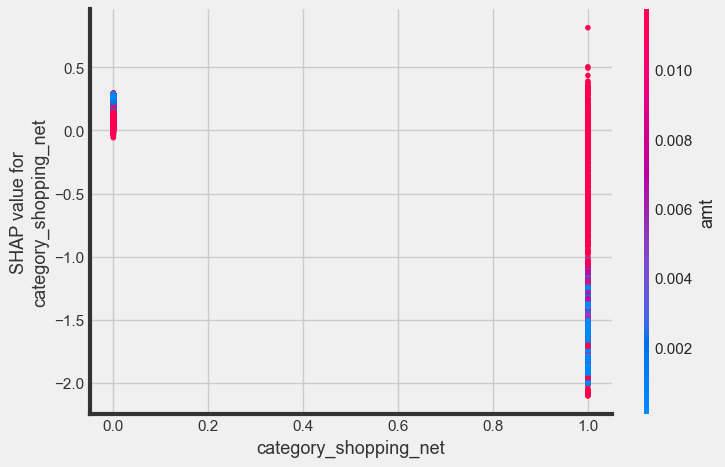

In [51]:
shap.dependence_plot("category_shopping_net", xgb_shap_values, X_train)

### Local Explination

In [47]:
# Generate SHAP values for the selected instances

instance_idx1 = 10
shap_values_instance1 = xgb_explainer.shap_values(X_train.iloc[instance_idx1])

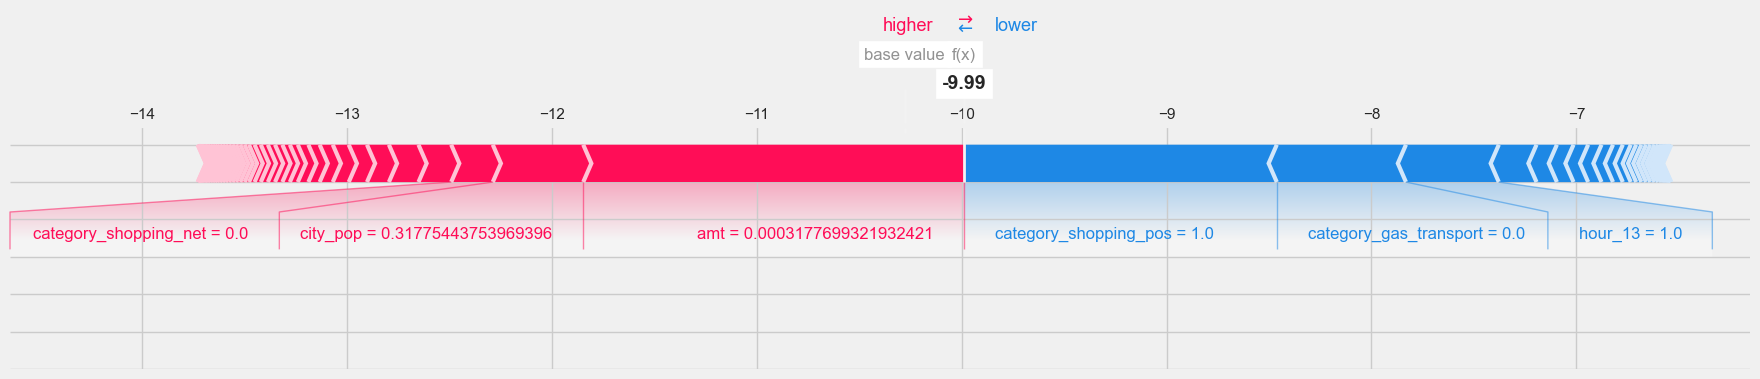

In [48]:
shap.force_plot(xgb_explainer.expected_value, shap_values_instance1, X_train.iloc[instance_idx1], matplotlib=True)

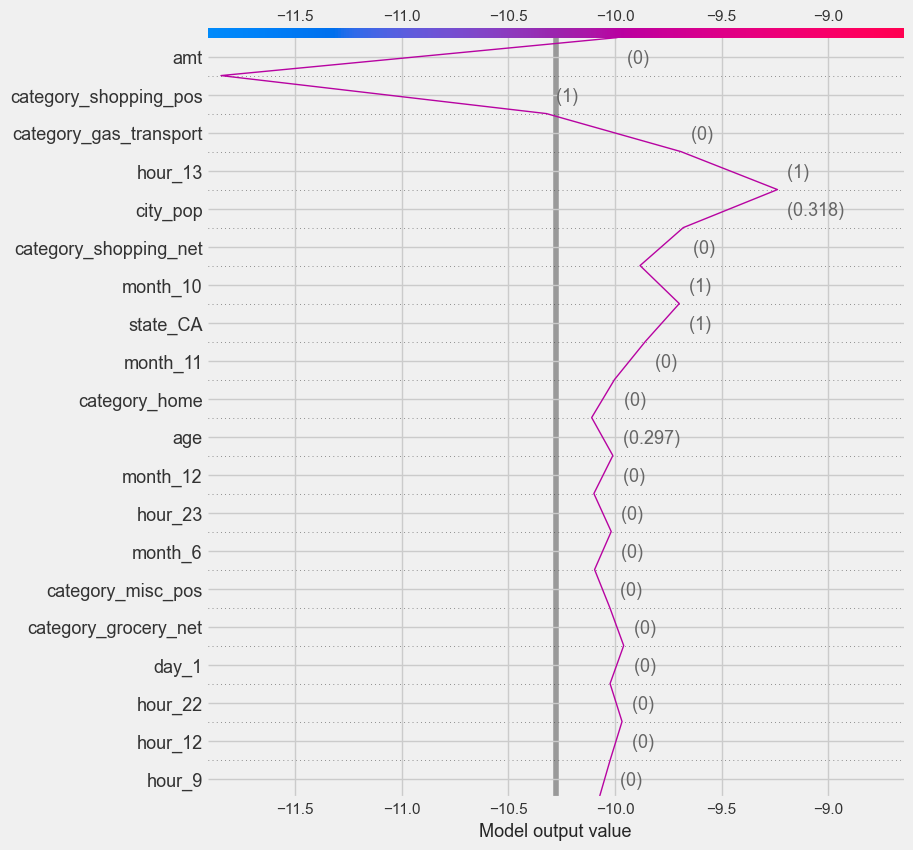

In [49]:
shap.decision_plot(xgb_explainer.expected_value, shap_values_instance1, X_train.iloc[instance_idx1], feature_names=feature_name_list)

# Reading material
- C. Molnar, Interpretable Machine Learning (2020)
https://christophm.github.io/interpretable-ml-book/
- Lundberg & S. Lee, A Unified Approach to Interpreting Model Predictions (2017) https://arxiv.org/pdf/1705.07874.pdf